In [2]:
import pandas as pd

import sys
import pathlib

import statsmodels.api as sm
#import pingouin as pg
import plotly.express as px

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, HBox, Dropdown, IntSlider, interact
from IPython.display import display

%matplotlib inline

In [3]:
#sys.path.append("G:/Shared drives/UGS_Flux/Data_Processing/Jupyter_Notebooks/MicroMet")
#sys.path.append("C:/Users/kladig/Documents/GitHub/MicroMet")
sys.path.append("../../Micromet")
import micromet

In [4]:
# dictionary of station ids as keys and values as subdirectories
site_folders = {#'US-UTD':'Dugout_Ranch',
                #'US-UTB':'BSF',
                #'US-UTJ':'Bluff',
                #'US-UTW':'Wellington',
                #'US-UTE':'Escalante',
                #'US-UTM':'Matheson',
                #'US-UTP':'Phrag',
                #'US-CdM':'Cedar_Mesa',
                'US-UTV':'Desert_View_Myton',
                }

compdf = {}
am = micromet.AmerifluxDataProcessor()

for key, value in site_folders.items():

    print(key)
    raw_fold = pathlib.Path('G:/Shared drives/UGS_Flux/Data_Downloads/')
    amflux_out = 'G:/Shared drives/UGS_Flux/Data_Processing/Ameriflux/'
    raw_data = am.raw_file_compile(raw_fold, value, search_str = "*Flux_AmeriFluxFormat*.dat")
    if raw_data is not None:
        am_data = micromet.Reformatter(raw_data)
        am_df = am_data.et_data
        compdf[key] = am_df
        micromet.outfile(am_df, key, amflux_out)

        
cdf = pd.concat(compdf,axis=0)

# make lists for selection dropdowns in the interactive parts of the code
categories = cdf.index.get_level_values(0).unique()
fields = list(cdf.columns)

US-UTV


In [5]:

def filter_data(index_value):
    #index_value = change['new']

    # Check if input index exists in DataFrame
    if index_value in cdf.index:
        display(cdf.loc[index_value])
    else:
        print(f"Index {index_value} does not exist in DataFrame.")

index_input = interact(filter_data,
    index_value = widgets.Dropdown(
        options=categories,
        value=categories[0],
        description='Categories',
        disabled=False
    ))

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-09-27 15:30:00,202309271530,202309271600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.00000,2,...,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000,-9999.000000,-9999.000000
2023-09-27 16:00:00,202309271600,202309271630,426.2824,2.053639,5.680495,0.206517,1.292678,0,26.21949,0,...,28.323020,12.38970,-3.356590,28.743700,14.41127,-0.983515,28.810980,1495.885,22.361910,10.157600
2023-09-27 16:30:00,202309271630,202309271700,425.6205,0.305455,5.577120,0.154510,0.360225,0,20.45234,0,...,28.409800,12.09985,-3.603430,28.759440,14.34083,-1.035038,28.845350,1661.353,22.195330,10.093790
2023-09-27 17:00:00,202309271700,202309271730,427.0450,2.695084,5.945370,0.775945,0.249454,2,12.04996,2,...,27.832930,13.40622,-2.845796,27.631310,16.79004,0.088550,27.730830,1000.000,21.904870,10.028290
2023-09-27 17:30:00,202309271730,202309271800,429.5003,2.407670,7.378632,0.749229,0.676132,2,-1.90653,2,...,24.831570,19.97823,0.098405,23.989490,23.80305,1.902416,23.917660,1573.533,21.472360,9.944234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 11:00:00,202412111100,202412111130,416.7929,0.466149,1.924251,0.039270,0.759092,0,11.12860,0,...,-2.912264,33.33337,-16.837280,-3.587174,51.31807,-12.187990,-3.420720,2063.033,-1.357274,5.924641
2024-12-11 11:30:00,202412111130,202412111200,417.9581,0.895478,1.972098,0.051208,-0.339350,0,12.53608,0,...,-1.926226,31.73090,-16.554300,-2.558418,48.43508,-11.954690,-2.414976,2088.971,-0.647562,6.115856
2024-12-11 12:00:00,202412111200,202412111230,419.1807,0.836469,2.004771,0.044418,0.660099,0,13.10445,0,...,-1.210341,30.58385,-16.365330,-2.020397,46.66240,-11.922010,-1.824322,2080.079,0.037923,6.344024


interactive(children=(Dropdown(description='Categories', options=('US-UTV',), value='US-UTV'), Output()), _dom…

# Interactive intital Plots

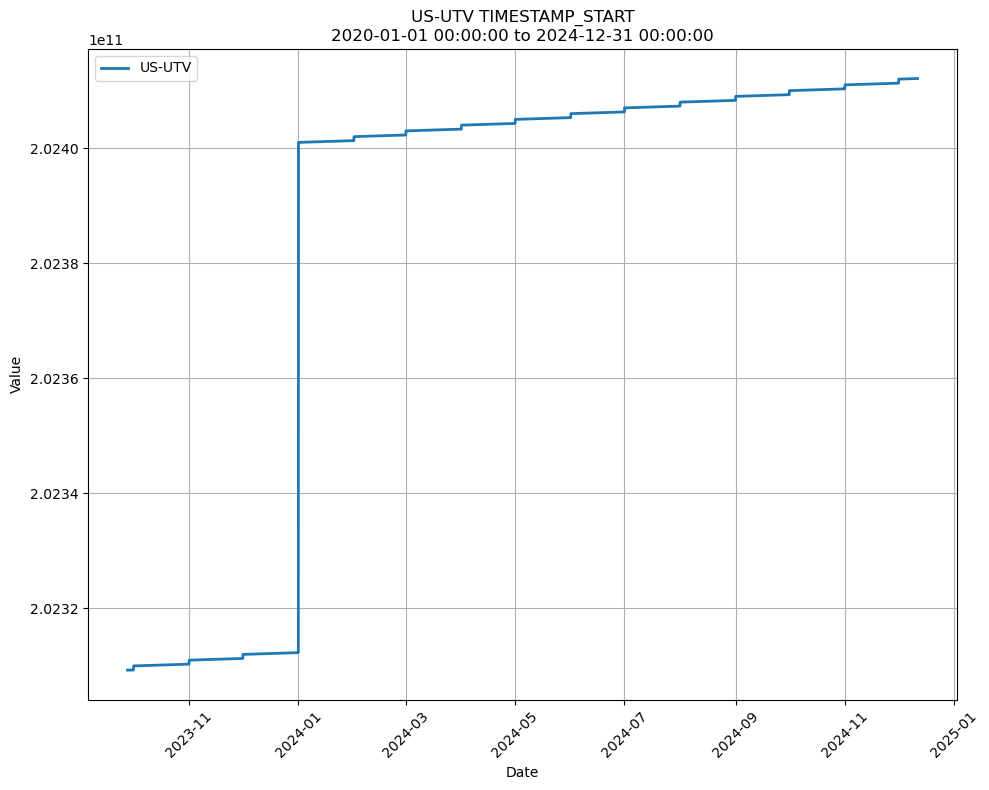

interactive(children=(Dropdown(description='Categories', options=('US-UTV',), value='US-UTV'), Dropdown(descri…

Button(description='Save Plot', style=ButtonStyle())

In [6]:
# Create interactive widgets with date range
interact(
    micromet.plot_timeseries_daterange,
    input_df = widgets.fixed(cdf),
    selected_station=widgets.Dropdown(
        options=categories,
        value=categories[0],
        description='Categories',
        disabled=False
    ),
    selected_field=widgets.Dropdown(
        options=fields,
        value=fields[0],
        description='Field',
        disabled=False
    ),
    start_date=widgets.DatePicker(
        description='Start Date',
        value=pd.to_datetime('2020-01-01')
    ),
    end_date=widgets.DatePicker(
        description='End Date',
        value=pd.to_datetime('2024-12-31')
    )
)

save_button = widgets.Button(description="Save Plot")
save_button.on_click(micromet.save_plot)
display(save_button)


In [6]:
UTP = cdf.loc['US-UTP']

In [9]:
UTP_filtered = UTP[(UTP.index >= pd.to_datetime('2024-06-07 09:30'))] #202310210000

In [10]:
UTP_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,FCH4_SSITC_TEST,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2024-06-07 09:30:00,202406070930,202406071000,424.3706,3.839077,12.222140,1.278883,-15.225880,0,291.27400,0,...,-9999.0,27.539100,28.375160,7.561287,-27.51766,-9999.000000,-89.62898,1824.971,-9999.000000,-9999.00000
2024-06-07 10:00:00,202406071000,202406071030,418.3364,7.318070,12.334810,2.196935,-32.107020,2,472.86190,2,...,-9999.0,27.460750,28.778110,7.566446,-28.15936,-9999.000000,-89.89870,1764.207,-9999.000000,-9999.00000
2024-06-07 10:30:00,202406071030,202406071100,413.0400,7.307825,12.766210,2.454322,-33.023410,0,549.15300,0,...,-9999.0,28.015550,28.793780,8.026611,-27.98338,0.336547,-89.78037,1993.324,-9999.000000,-9999.00000
2024-06-07 11:00:00,202406071100,202406071130,412.2616,6.309856,12.825790,2.326428,-31.422510,0,565.84180,0,...,-9999.0,28.328210,28.412340,8.110006,-27.44169,0.334833,-89.46118,1819.947,-9999.000000,-9999.00000
2024-06-07 11:30:00,202406071130,202406071200,412.4011,6.215253,11.991870,2.101824,-30.908810,2,551.81260,2,...,-9999.0,28.410790,26.476850,7.156018,-26.83442,0.336897,-89.05682,1634.638,-9999.000000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-10 08:00:00,202502100800,202502100830,454.5250,1.578815,0.383130,0.232703,-0.001666,2,15.01259,2,...,-9999.0,-5.473885,7.947024,-37.359060,-9999.00000,-9999.000000,-112.22690,2074.711,-8.051111,91.20137
2025-02-10 08:30:00,202502100830,202502100900,454.2239,2.217634,1.013121,0.148564,-3.640874,2,13.58694,2,...,-9999.0,-3.519708,18.626560,-24.158920,-9999.00000,-9999.000000,-112.26640,1889.291,-5.572747,91.36172
2025-02-10 09:00:00,202502100900,202502100930,440.4617,7.402176,1.322766,0.157329,17.728000,1,27.60374,1,...,-9999.0,-1.897653,21.599340,-21.091850,-9999.00000,-9999.000000,-109.35520,1868.980,-2.417953,91.36598


In [11]:
UTP_filtered.to_csv(amflux_out + 'US-UTP/US-UTP_HH_202406070930_202502101030.csv')

In [42]:
UTJ = cdf.loc['US-UTJ']

In [43]:
UTJ_filtered = UTJ.drop(columns=['TA_1_4_1'])

In [44]:
max_col1 = UTJ['P'].max()
print(max_col1)

0.0


In [45]:
UTJ_filtered['P'] = np.nan

In [46]:
UTJ_filtered = UTJ_filtered[(UTJ_filtered.index >= pd.to_datetime('2024-06-26 12:30'))] #202310210000

In [47]:
UTJ_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,datalogger_no,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2024-06-26 12:30:00,202406261230,202406261300,598.4542,123.222100,25.883480,8.177180,-9999.000000,2,26.95300,2,...,21020.0,30.523270,50.23525,18.361090,30.111450,38.27126,14.294100,120.5280,30.576290,39.60568
2024-06-26 13:00:00,202406261300,202406261330,514.8118,136.620600,18.071590,8.600083,41.909960,2,279.44080,2,...,21020.0,32.079960,31.23560,11.803200,30.324540,34.01888,12.649810,262.4845,29.970470,43.41458
2024-06-26 13:30:00,202406261330,202406261400,429.3101,81.064070,15.614260,5.876797,32.744490,1,365.50250,0,...,21020.0,30.791090,30.08422,10.636220,30.185000,36.34372,13.566440,164.2747,29.624160,45.33062
2024-06-26 14:00:00,202406261400,202406261430,407.1321,54.662170,15.815130,4.863752,-9999.000000,0,373.86750,0,...,21020.0,31.143130,29.50540,10.936130,29.491010,36.68658,13.126000,189.7034,29.201720,48.15456
2024-06-26 14:30:00,202406261430,202406261500,408.7382,22.288050,12.996320,1.536223,-34.419670,0,238.79910,0,...,21020.0,28.687980,28.42615,8.479299,28.095000,38.49767,12.645560,141.4872,28.388910,49.93322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 11:30:00,202502191130,202502191200,416.9350,0.622353,3.037314,0.105039,0.819240,0,23.95609,0,...,21020.0,9.189806,22.78484,-11.007970,8.496209,30.44681,-7.897306,2048.0600,6.578123,16.01862
2025-02-19 12:00:00,202502191200,202502191230,417.3500,0.539036,3.092138,0.116248,1.538998,0,27.64913,0,...,21020.0,9.508575,22.66817,-10.792710,8.769157,29.96702,-7.865414,2004.6200,7.636071,16.24565
2025-02-19 12:30:00,202502191230,202502191300,417.0466,0.650661,3.014064,0.116036,1.634825,0,30.79678,0,...,21020.0,10.255120,21.00945,-11.120130,9.614892,27.89067,-8.053608,1848.3500,8.556820,16.44785


In [13]:
UTJ_filtered.to_csv(amflux_out + 'US-UTJ/US-UTJ_HH_202406261230_202502191400.csv')

In [7]:
UTV = cdf.loc['US-UTV']

In [8]:
UTV

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-09-27 15:30:00,202309271530,202309271600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.00000,2,...,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000,-9999.000000,-9999.000000
2023-09-27 16:00:00,202309271600,202309271630,426.2824,2.053639,5.680495,0.206517,1.292678,0,26.21949,0,...,28.323020,12.38970,-3.356590,28.743700,14.41127,-0.983515,28.810980,1495.885,22.361910,10.157600
2023-09-27 16:30:00,202309271630,202309271700,425.6205,0.305455,5.577120,0.154510,0.360225,0,20.45234,0,...,28.409800,12.09985,-3.603430,28.759440,14.34083,-1.035038,28.845350,1661.353,22.195330,10.093790
2023-09-27 17:00:00,202309271700,202309271730,427.0450,2.695084,5.945370,0.775945,0.249454,2,12.04996,2,...,27.832930,13.40622,-2.845796,27.631310,16.79004,0.088550,27.730830,1000.000,21.904870,10.028290
2023-09-27 17:30:00,202309271730,202309271800,429.5003,2.407670,7.378632,0.749229,0.676132,2,-1.90653,2,...,24.831570,19.97823,0.098405,23.989490,23.80305,1.902416,23.917660,1573.533,21.472360,9.944234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 11:00:00,202412111100,202412111130,416.7929,0.466149,1.924251,0.039270,0.759092,0,11.12860,0,...,-2.912264,33.33337,-16.837280,-3.587174,51.31807,-12.187990,-3.420720,2063.033,-1.357274,5.924641
2024-12-11 11:30:00,202412111130,202412111200,417.9581,0.895478,1.972098,0.051208,-0.339350,0,12.53608,0,...,-1.926226,31.73090,-16.554300,-2.558418,48.43508,-11.954690,-2.414976,2088.971,-0.647562,6.115856
2024-12-11 12:00:00,202412111200,202412111230,419.1807,0.836469,2.004771,0.044418,0.660099,0,13.10445,0,...,-1.210341,30.58385,-16.365330,-2.020397,46.66240,-11.922010,-1.824322,2080.079,0.037923,6.344024


In [9]:
UTV_filtered = UTV

In [10]:
# Define the date boundaries
start_date = pd.to_datetime('2023-10-15')
end_date = pd.to_datetime('2023-11-21')

# Create a boolean mask to select rows within August 2024
mask = (UTV_filtered.index >= start_date) & (UTV_filtered.index <= end_date)

# Set the values of 'tw' to -9999 within August 2024
UTV_filtered.loc[mask, 'TA_1_4_1'] = -9999
UTV_filtered.loc[mask, 'TS_1_2_1'] = -9999
UTV_filtered.loc[mask, 'TS_1_1_1'] = -9999
UTV_filtered.loc[mask, 'NETRAD'] = -9999

In [11]:
# Define the date boundaries
start_date2 = pd.to_datetime('2024-02-20')
end_date2 = pd.to_datetime('2024-03-14')

# Create a boolean mask to select rows within August 2024
mask = (UTV_filtered.index >= start_date2) & (UTV_filtered.index <= end_date2)

# Set the values of 'tw' to -9999 within August 2024
UTV_filtered.loc[mask, 'TS_1_2_1'] = -9999
UTV_filtered.loc[mask, 'SW_IN'] = -9999

In [12]:
# Define the date boundaries
start_date3 = pd.to_datetime('2024-04-18')
end_date3 = pd.to_datetime('2024-10-26')

# Create a boolean mask to select rows within August 2024
mask = (UTV_filtered.index >= start_date3) & (UTV_filtered.index <= end_date3)

# Set the values of 'tw' to -9999 within August 2024
UTV_filtered.loc[mask, 'TA_1_4_1'] = -9999
UTV_filtered.loc[mask, 'LW_OUT'] = -9999
UTV_filtered.loc[mask, 'LW_IN'] = -9999
UTV_filtered.loc[mask, 'SW_OUT'] = -9999

In [13]:
def replace_low_values(df, column_name, threshold=150, replacement=-9999):
  """
  Replaces values in a specified column of a Pandas DataFrame that are less than a threshold with a replacement value.

  Args:
    df: Pandas DataFrame.
    column_name: Name of the column to modify.
    threshold: Threshold value. Values less than this will be replaced.
    replacement: Value to replace values below the threshold.

  Returns:
    Pandas DataFrame with the modified column.
  """

  df[column_name] = np.where(df[column_name] < threshold, replacement, df[column_name])
  return df


In [14]:
UTV_filtered = replace_low_values(UTV_filtered, 'LW_IN')

In [15]:
UTV_filtered = replace_low_values(UTV_filtered, 'LW_OUT')

In [16]:
UTV_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,TS_1_2_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-09-27 15:30:00,202309271530,202309271600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.00000,2,...,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.000,-9999.000000,-9999.000000,NaN
2023-09-27 16:00:00,202309271600,202309271630,426.2824,2.053639,5.680495,0.206517,1.292678,0,26.21949,0,...,12.38970,-3.356590,28.743700,14.41127,-0.983515,28.810980,1495.885,22.361910,10.157600,NaN
2023-09-27 16:30:00,202309271630,202309271700,425.6205,0.305455,5.577120,0.154510,0.360225,0,20.45234,0,...,12.09985,-3.603430,28.759440,14.34083,-1.035038,28.845350,1661.353,22.195330,10.093790,NaN
2023-09-27 17:00:00,202309271700,202309271730,427.0450,2.695084,5.945370,0.775945,0.249454,2,12.04996,2,...,13.40622,-2.845796,27.631310,16.79004,0.088550,27.730830,1000.000,21.904870,10.028290,NaN
2023-09-27 17:30:00,202309271730,202309271800,429.5003,2.407670,7.378632,0.749229,0.676132,2,-1.90653,2,...,19.97823,0.098405,23.989490,23.80305,1.902416,23.917660,1573.533,21.472360,9.944234,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 11:00:00,202412111100,202412111130,416.7929,0.466149,1.924251,0.039270,0.759092,0,11.12860,0,...,33.33337,-16.837280,-3.587174,51.31807,-12.187990,-3.420720,2063.033,-1.357274,5.924641,NaN
2024-12-11 11:30:00,202412111130,202412111200,417.9581,0.895478,1.972098,0.051208,-0.339350,0,12.53608,0,...,31.73090,-16.554300,-2.558418,48.43508,-11.954690,-2.414976,2088.971,-0.647562,6.115856,NaN
2024-12-11 12:00:00,202412111200,202412111230,419.1807,0.836469,2.004771,0.044418,0.660099,0,13.10445,0,...,30.58385,-16.365330,-2.020397,46.66240,-11.922010,-1.824322,2080.079,0.037923,6.344024,NaN


In [17]:
UTV_filtered.to_csv(amflux_out + 'US-UTV/US-UTV_HH_202309271530_202412111330.csv')

In [25]:
UTE = cdf.loc['US-UTE']

In [26]:
UTE

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2024-06-24 14:30:00,202406241430,202406241500,427.0199,0.628133,17.268620,1.019290,0.069210,1,156.40850,1,...,29.95141,33.26877,12.052600,30.32464,33.45364,12.461810,30.06976,1665.4670,25.72815,22.44161
2024-06-24 15:00:00,202406241500,202406241530,425.9499,1.019297,15.189360,0.703052,0.285446,1,138.30920,1,...,30.02516,29.22197,10.155240,30.35956,29.77183,10.726350,30.13765,1765.9350,25.52736,22.41975
2024-06-24 15:30:00,202406241530,202406241600,426.4163,1.965228,14.875330,0.808026,1.081928,2,154.11530,2,...,30.24634,28.28498,9.838229,30.69433,28.63222,10.413350,30.40344,1495.7350,25.12511,22.32785
2024-06-24 16:00:00,202406241600,202406241630,426.0534,2.665907,15.611400,1.002919,0.519664,2,135.56180,2,...,30.75179,28.75255,10.538220,31.14621,29.16225,11.090660,30.90061,1491.0620,24.63557,22.18172
2024-06-24 16:30:00,202406241630,202406241700,427.8476,1.102921,15.210340,0.703084,1.147608,2,95.06287,2,...,29.16274,30.77158,10.165810,29.57434,30.96792,10.630690,29.30510,341.9711,24.14865,22.03216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 11:30:00,202409251130,202409251200,409.7999,3.704233,6.466605,1.280181,-11.933860,0,259.77200,0,...,26.39621,15.54496,-2.012755,26.67691,17.88223,0.226853,26.44501,1637.9450,14.69089,38.35324
2024-09-25 12:00:00,202409251200,202409251230,410.1287,2.593953,6.581631,1.075975,-12.745010,0,280.12370,0,...,26.85370,15.39098,-1.723036,27.25689,17.63266,0.569489,26.98384,1492.7110,15.17050,38.14456
2024-09-25 12:30:00,202409251230,202409251300,410.7018,2.204362,6.482304,1.025199,-11.282580,0,268.55680,0,...,27.16685,14.86384,-1.921114,27.56701,17.10755,0.412204,27.29602,1496.2820,15.54232,38.03682


In [21]:
UTD = cdf.loc['US-UTD']

In [22]:
UTD

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-05-24 14:30:00,202305241430,202305241500,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.000000,2,...,-9999.00000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.00000,-9999.0000,-9999.00000,-9999.000000
2023-05-24 15:00:00,202305241500,202305241530,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.000000,2,...,-9999.00000,-9999.000000,-9999.00000,-9999.00000,-9999.00000,-9999.000000,-9999.00000,-9999.0000,29.48096,-9999.000000
2023-05-24 15:30:00,202305241530,202305241600,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.000000,2,...,-9999.00000,-9999.000000,-9999.00000,25.38628,22.45322,-9999.000000,25.39862,-9999.0000,33.92534,-9999.000000
2023-05-24 16:00:00,202305241600,202305241630,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.000000,2,...,-9999.00000,-9999.000000,-9999.00000,25.23140,20.24082,-9999.000000,25.16045,-9999.0000,29.87233,-9999.000000
2023-05-24 16:30:00,202305241630,202305241700,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.000000,2,...,-9999.00000,-9999.000000,-9999.00000,25.73919,19.89970,-9999.000000,25.81208,-9999.0000,37.49114,-9999.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-09 03:30:00,202410090330,202410090400,-9999.0,0.516583,1.966443,0.039405,2.589321,0,8.954890,0,...,16.76510,8.712864,-16.70460,15.32634,28.47454,-2.841900,15.31291,201.2113,16.28256,3.983555
2024-10-09 04:00:00,202410090400,202410090430,-9999.0,0.945169,1.963870,0.054052,1.761431,0,8.315956,0,...,16.68421,8.760013,-16.72005,15.19718,28.70125,-2.853477,15.22217,207.0056,16.15186,3.986333
2024-10-09 04:30:00,202410090430,202410090500,-9999.0,0.862569,2.000544,0.051823,2.412308,0,10.154760,0,...,15.91649,9.364746,-16.49656,14.50520,30.16165,-2.783151,14.48455,206.8910,15.99062,3.984944


In [7]:
CdM = cdf.loc['US-CdM']

In [8]:
CdM

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-06-14 11:00:00,202306141100,202306141130,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.00000,2,...,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000
2023-06-14 11:30:00,202306141130,202306141200,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,2,-9999.00000,2,...,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.00000,-9999.000000,-9999.000000,-9999.0000,-9999.000000,-9999.00000
2023-06-14 12:00:00,202306141200,202306141230,404.8652,7.160377,11.003180,1.408956,-9999.000000,1,-9999.00000,0,...,21.153620,36.32776,5.566691,-9999.000000,-9999.00000,-9999.000000,-9999.000000,1791.4890,-9999.000000,-9999.00000
2023-06-14 12:30:00,202306141230,202306141300,403.2438,6.578680,10.929970,1.396008,-19.724970,0,277.55290,0,...,21.549370,35.22253,5.468623,-9999.000000,-9999.00000,-9999.000000,-9999.000000,1550.0890,-9999.000000,-9999.00000
2023-06-14 13:00:00,202306141300,202306141330,397.2703,7.669390,12.208020,1.357026,-29.465460,2,290.63500,2,...,19.706110,44.59672,7.067034,-9999.000000,-9999.00000,-9999.000000,-9999.000000,294.8908,-9999.000000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 14:00:00,202502191400,202502191430,413.2686,0.339625,2.511678,0.093660,-0.300697,0,35.70343,0,...,6.686787,20.83055,-14.213340,7.111922,31.69165,-8.595718,7.152931,1590.2950,3.893486,10.72906
2025-02-19 14:30:00,202502191430,202502191500,414.1462,0.496693,2.433739,0.101512,-0.603856,0,38.48272,0,...,7.384526,19.23979,-14.599300,8.022134,29.05779,-8.908402,8.016482,1660.1290,4.398078,10.90688
2025-02-19 15:00:00,202502191500,202502191530,414.1009,0.464151,2.336450,0.142906,-0.260906,0,33.26217,0,...,8.037440,17.67804,-15.106490,8.329465,27.65192,-9.283827,8.343174,1806.9270,4.552261,11.01964


In [9]:
CdM_filtered = CdM[(CdM.index >= pd.to_datetime('2023-10-21 00:00'))] #202310210000

In [10]:
CdM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-10-21 00:00:00,202310210000,202310210030,417.0894,19.782020,3.103104,0.096281,12.251860,2,2.096544,2,...,7.078386,25.94180,-11.18607,-9999.000000,-9999.00000,-9999.000000,-9999.000000,135.0722,-9999.000000,-9999.00000
2023-10-21 00:30:00,202310210030,202310210100,441.0382,31.869310,3.063356,0.289677,16.444920,2,5.724140,2,...,5.413504,28.66561,-11.39440,-9999.000000,-9999.00000,-9999.000000,-9999.000000,1924.4320,-9999.000000,-9999.00000
2023-10-21 01:00:00,202310210100,202310210130,401.9043,7.502060,2.629002,0.062285,3.350418,2,1.582649,2,...,5.148736,25.10138,-13.24100,-9999.000000,-9999.00000,-9999.000000,-9999.000000,146.3412,-9999.000000,-9999.00000
2023-10-21 01:30:00,202310210130,202310210200,468.6647,46.055640,2.823813,0.171091,-2.290658,2,0.041160,2,...,5.654372,26.10487,-12.37626,-9999.000000,-9999.00000,-9999.000000,-9999.000000,114.0993,-9999.000000,-9999.00000
2023-10-21 02:00:00,202310210200,202310210230,437.8490,36.888170,2.752612,0.074702,11.655720,2,1.975112,2,...,5.244596,26.13475,-12.67834,-9999.000000,-9999.00000,-9999.000000,-9999.000000,109.5473,-9999.000000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 14:00:00,202502191400,202502191430,413.2686,0.339625,2.511678,0.093660,-0.300697,0,35.703430,0,...,6.686787,20.83055,-14.21334,7.111922,31.69165,-8.595718,7.152931,1590.2950,3.893486,10.72906
2025-02-19 14:30:00,202502191430,202502191500,414.1462,0.496693,2.433739,0.101512,-0.603856,0,38.482720,0,...,7.384526,19.23979,-14.59930,8.022134,29.05779,-8.908402,8.016482,1660.1290,4.398078,10.90688
2025-02-19 15:00:00,202502191500,202502191530,414.1009,0.464151,2.336450,0.142906,-0.260906,0,33.262170,0,...,8.037440,17.67804,-15.10649,8.329465,27.65192,-9.283827,8.343174,1806.9270,4.552261,11.01964


In [11]:
def add_hour_after_date(df, datetime_col, cutoff_date='202312120000'):
  """
  Subtracts one hour from a datetime column for every date after a specified cutoff date.

  Args:
    df: The pandas DataFrame containing the datetime column.
    datetime_col: The name of the datetime column.
    cutoff_date: The cutoff date (default: '2024-05-01').

  Returns:
    A new DataFrame with the modified datetime column.
  """

  cutoff_date = pd.to_datetime(cutoff_date, format = '%Y%m%d%H%M')
  df.loc[df[datetime_col] > cutoff_date, datetime_col] += pd.to_timedelta('1 hour') 

  return df

  df.drop('date_only', axis=1, inplace=True) 

  return df

In [12]:
def drop_two_zeros_from_column(df, column_name):
  """
  Drops the last two zeros from the end of every string in a specified column of a pandas DataFrame.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column containing the strings.

  Returns:
    A new DataFrame with the modified column.
  """

  def drop_two_trailing_zeros(string):
    if string.endswith("00"):
      return string[:-2]
    else:
      return string

  df[column_name] = df[column_name].apply(drop_two_trailing_zeros)
  return df

In [13]:
CdM_filtered['TIMESTAMP_START'] = pd.to_datetime(CdM_filtered['TIMESTAMP_START'], format = '%Y%m%d%H%M')
CdM_filtered['TIMESTAMP_END'] = pd.to_datetime(CdM_filtered['TIMESTAMP_END'], format = '%Y%m%d%H%M')

CdM_filtered = add_hour_after_date(CdM_filtered, 'TIMESTAMP_START')
CdM_filtered = add_hour_after_date(CdM_filtered, 'TIMESTAMP_END')

In [14]:
CdM_filtered['TIMESTAMP_START'] = CdM_filtered['TIMESTAMP_START'].astype('str').str.replace('-', '').str.replace(' ', '').str.replace(':', '')
CdM_filtered['TIMESTAMP_END'] = CdM_filtered['TIMESTAMP_END'].astype('str').str.replace('-', '').str.replace(' ', '').str.replace(':', '')

In [15]:
CdM_filtered = drop_two_zeros_from_column(CdM_filtered, 'TIMESTAMP_START')

CdM_filtered = drop_two_zeros_from_column(CdM_filtered, 'TIMESTAMP_END')

In [16]:
CdM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_2_1,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1
datetime_start,,,,,,,,,,,,,,,,,,,,,
2023-10-21 00:00:00,202310210000,202310210030,417.0894,19.782020,3.103104,0.096281,12.251860,2,2.096544,2,...,7.078386,25.94180,-11.18607,-9999.000000,-9999.00000,-9999.000000,-9999.000000,135.0722,-9999.000000,-9999.00000
2023-10-21 00:30:00,202310210030,202310210100,441.0382,31.869310,3.063356,0.289677,16.444920,2,5.724140,2,...,5.413504,28.66561,-11.39440,-9999.000000,-9999.00000,-9999.000000,-9999.000000,1924.4320,-9999.000000,-9999.00000
2023-10-21 01:00:00,202310210100,202310210130,401.9043,7.502060,2.629002,0.062285,3.350418,2,1.582649,2,...,5.148736,25.10138,-13.24100,-9999.000000,-9999.00000,-9999.000000,-9999.000000,146.3412,-9999.000000,-9999.00000
2023-10-21 01:30:00,202310210130,202310210200,468.6647,46.055640,2.823813,0.171091,-2.290658,2,0.041160,2,...,5.654372,26.10487,-12.37626,-9999.000000,-9999.00000,-9999.000000,-9999.000000,114.0993,-9999.000000,-9999.00000
2023-10-21 02:00:00,202310210200,202310210230,437.8490,36.888170,2.752612,0.074702,11.655720,2,1.975112,2,...,5.244596,26.13475,-12.67834,-9999.000000,-9999.00000,-9999.000000,-9999.000000,109.5473,-9999.000000,-9999.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-19 14:00:00,202502191500,202502191530,413.2686,0.339625,2.511678,0.093660,-0.300697,0,35.703430,0,...,6.686787,20.83055,-14.21334,7.111922,31.69165,-8.595718,7.152931,1590.2950,3.893486,10.72906
2025-02-19 14:30:00,202502191530,202502191600,414.1462,0.496693,2.433739,0.101512,-0.603856,0,38.482720,0,...,7.384526,19.23979,-14.59930,8.022134,29.05779,-8.908402,8.016482,1660.1290,4.398078,10.90688
2025-02-19 15:00:00,202502191600,202502191630,414.1009,0.464151,2.336450,0.142906,-0.260906,0,33.262170,0,...,8.037440,17.67804,-15.10649,8.329465,27.65192,-9.283827,8.343174,1806.9270,4.552261,11.01964


In [17]:
CdM_filtered.to_csv(amflux_out + 'US-CdM/US-CdM_HH_202310210000_202502191730.csv')

In [6]:
UTM = cdf.loc['US-UTM']

In [7]:
#start_date = pd.to_datetime('202210261430')
#to_delete = [pd.to_datetime('2022-10-26 14:30'), pd.to_datetime('2024-10-09 06:00')]
#UTM = UTM[~(UTM.index.strftime('%Y-%m-%d %H:%M').isin(to_delete))]
#to_save = [pd.to_datetime('2022-10-26 14:30'), pd.to_datetime('2024-10-09 06:00')] 
#UTM2 = UTM[~UTM.index.isin(to_save)] 
UTM_filtered = UTM[(UTM.index >= pd.to_datetime('2022-10-26 15:00'))] 


In [8]:
UTM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2022-10-26 15:00:00,202210261500,202210261530,414.0292,0.322101,9.419745,0.186403,3.358857,1.0,52.288810,1.0,...,3.143660,-69.81140,-9999.0,1796.0090,8.494673,-9999.0,-9999.0,NaN,NaN,NaN
2022-10-26 15:30:00,202210261530,202210261600,413.9501,0.296363,9.417489,0.179287,1.980242,1.0,36.719310,1.0,...,2.634895,-71.04749,-9999.0,1757.6610,8.514671,-9999.0,-9999.0,NaN,NaN,NaN
2022-10-26 16:00:00,202210261600,202210261630,413.5509,0.426511,9.342575,0.105641,1.625808,-9999.0,17.346570,-9999.0,...,3.617607,-69.36633,-9999.0,1630.5670,8.671304,-9999.0,-9999.0,NaN,NaN,NaN
2022-10-26 16:30:00,202210261630,202210261700,412.5099,0.541630,9.403389,0.187825,0.552079,-9999.0,-5.921501,-9999.0,...,8.011357,-62.97399,-9999.0,1492.3300,8.799917,-9999.0,-9999.0,NaN,NaN,NaN
2022-10-26 17:00:00,202210261700,202210261730,415.6979,5.603356,9.722460,0.094429,2.767656,-9999.0,1.704712,-9999.0,...,14.926370,-57.97340,-9999.0,111.6777,8.760329,-9999.0,-9999.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 05:30:00,202412110530,202412110600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.00000,-9999.0,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN
2024-12-11 06:00:00,202412110600,202412110630,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.00000,-9999.0,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN
2024-12-11 06:30:00,202412110630,202412110700,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.000000,-9999.00000,-9999.0,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN


In [9]:
UTM_filtered = UTM_filtered.drop('TA_1_4_1', axis = 1)

In [10]:
UTM_filtered = UTM_filtered.drop('RH_1_3_1', axis = 1)

In [11]:
# Define the date boundaries
start_date = pd.to_datetime('2023-05-01')
end_date = pd.to_datetime('2024-05-01')

# Create boolean masks for the date ranges
before_05_2023 = UTM_filtered.index < start_date
after_05_2024 = UTM_filtered.index > end_date

# Set 'TA' to -9999 for the specified date ranges
UTM_filtered.loc[before_05_2023, 'TA_1_3_1'] = -9999
UTM_filtered.loc[after_05_2024, 'TA_1_3_1'] = -9999
UTM_filtered.loc[before_05_2023, 'RH_1_3_1'] = -9999

In [12]:
start_date2 = pd.to_datetime('2024-08-01')
end_date2 = pd.to_datetime('2024-08-31')

# Create a boolean mask to select rows within August 2024
mask = (UTM_filtered.index >= start_date2) & (UTM_filtered.index <= end_date2)

# Set the values of 'tw' to -9999 within August 2024
UTM_filtered.loc[mask, 'LW_IN'] = -9999


In [13]:
start_date3 = pd.to_datetime('2024-10-10')
end_date3 = pd.to_datetime('2024-10-18')

# Create a boolean mask to select rows within August 2024
mask = (UTM_filtered.index >= start_date3) & (UTM_filtered.index <= end_date3)

# Set the values of 'tw' to -9999 within August 2024
UTM_filtered.loc[mask, 'LW_IN'] = -9999

In [14]:
UTM_filtered.reset_index(drop=True, inplace=True)

In [15]:
UTM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_3_1,T_DP_1_3_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST,RH_1_3_1
0,202210261500,202210261530,414.0292,0.322101,9.419745,0.186403,3.358857,1.0,52.288810,1.0,...,-9999.0,-69.81140,1796.0090,8.494673,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
1,202210261530,202210261600,413.9501,0.296363,9.417489,0.179287,1.980242,1.0,36.719310,1.0,...,-9999.0,-71.04749,1757.6610,8.514671,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
2,202210261600,202210261630,413.5509,0.426511,9.342575,0.105641,1.625808,-9999.0,17.346570,-9999.0,...,-9999.0,-69.36633,1630.5670,8.671304,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
3,202210261630,202210261700,412.5099,0.541630,9.403389,0.187825,0.552079,-9999.0,-5.921501,-9999.0,...,-9999.0,-62.97399,1492.3300,8.799917,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
4,202210261700,202210261730,415.6979,5.603356,9.722460,0.094429,2.767656,-9999.0,1.704712,-9999.0,...,-9999.0,-57.97340,111.6777,8.760329,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37277,202412110530,202412110600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37278,202412110600,202412110630,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37279,202412110630,202412110700,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37280,202412110700,202412110730,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN


In [16]:
def subtract_hour_after_date(df, datetime_col, cutoff_date='202405010000'):
  """
  Subtracts one hour from a datetime column for every date after a specified cutoff date.

  Args:
    df: The pandas DataFrame containing the datetime column.
    datetime_col: The name of the datetime column.
    cutoff_date: The cutoff date (default: '2024-05-01').

  Returns:
    A new DataFrame with the modified datetime column.
  """

  cutoff_date = pd.to_datetime(cutoff_date, format = '%Y%m%d%H%M')
  df.loc[df[datetime_col] > cutoff_date, datetime_col] -= pd.to_timedelta('1 hour') 

  return df

  df.drop('date_only', axis=1, inplace=True) 

  return df

In [17]:
dtypelist = UTM_filtered.dtypes
print(dtypelist)

TIMESTAMP_START      int64
TIMESTAMP_END        int64
CO2                float64
CO2_SIGMA          float64
H2O                float64
                    ...   
T_CANOPY           float64
CH4                float64
FCH4               float64
FCH4_SSITC_TEST    float64
RH_1_3_1           float64
Length: 65, dtype: object


In [18]:
UTM_filtered['TIMESTAMP_START'] = pd.to_datetime(UTM_filtered['TIMESTAMP_START'], format = '%Y%m%d%H%M')

In [19]:
UTM_filtered['TIMESTAMP_END'] = pd.to_datetime(UTM_filtered['TIMESTAMP_END'], format = '%Y%m%d%H%M')

In [20]:
UTM_filtered = subtract_hour_after_date(UTM_filtered, 'TIMESTAMP_END', '202405010000')

In [21]:
UTM_filtered = subtract_hour_after_date(UTM_filtered, 'TIMESTAMP_START', '202405010000')

In [22]:
UTM_filtered['TIMESTAMP_START'] = UTM_filtered['TIMESTAMP_START'].astype('str').str.replace('-', '').str.replace(' ', '').str.replace(':', '')
UTM_filtered['TIMESTAMP_END'] = UTM_filtered['TIMESTAMP_END'].astype('str').str.replace('-', '').str.replace(' ', '').str.replace(':', '')

In [23]:
UTM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_3_1,T_DP_1_3_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST,RH_1_3_1
0,20221026150000,20221026153000,414.0292,0.322101,9.419745,0.186403,3.358857,1.0,52.288810,1.0,...,-9999.0,-69.81140,1796.0090,8.494673,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
1,20221026153000,20221026160000,413.9501,0.296363,9.417489,0.179287,1.980242,1.0,36.719310,1.0,...,-9999.0,-71.04749,1757.6610,8.514671,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
2,20221026160000,20221026163000,413.5509,0.426511,9.342575,0.105641,1.625808,-9999.0,17.346570,-9999.0,...,-9999.0,-69.36633,1630.5670,8.671304,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
3,20221026163000,20221026170000,412.5099,0.541630,9.403389,0.187825,0.552079,-9999.0,-5.921501,-9999.0,...,-9999.0,-62.97399,1492.3300,8.799917,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
4,20221026170000,20221026173000,415.6979,5.603356,9.722460,0.094429,2.767656,-9999.0,1.704712,-9999.0,...,-9999.0,-57.97340,111.6777,8.760329,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37277,20241211043000,20241211050000,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37278,20241211050000,20241211053000,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37279,20241211053000,20241211060000,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37280,20241211060000,20241211063000,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN


In [15]:
def drop_two_zeros_from_column(df, column_name):
  """
  Drops the last two zeros from the end of every string in a specified column of a pandas DataFrame.

  Args:
    df: The pandas DataFrame.
    column_name: The name of the column containing the strings.

  Returns:
    A new DataFrame with the modified column.
  """

  def drop_two_trailing_zeros(string):
    if string.endswith("00"):
      return string[:-2]
    else:
      return string

  df[column_name] = df[column_name].apply(drop_two_trailing_zeros)
  return df

In [25]:
UTM_filtered = drop_two_zeros_from_column(UTM_filtered, 'TIMESTAMP_START')

UTM_filtered = drop_two_zeros_from_column(UTM_filtered, 'TIMESTAMP_END')

In [26]:
UTM_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,TA_1_3_1,T_DP_1_3_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST,RH_1_3_1
0,202210261500,202210261530,414.0292,0.322101,9.419745,0.186403,3.358857,1.0,52.288810,1.0,...,-9999.0,-69.81140,1796.0090,8.494673,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
1,202210261530,202210261600,413.9501,0.296363,9.417489,0.179287,1.980242,1.0,36.719310,1.0,...,-9999.0,-71.04749,1757.6610,8.514671,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
2,202210261600,202210261630,413.5509,0.426511,9.342575,0.105641,1.625808,-9999.0,17.346570,-9999.0,...,-9999.0,-69.36633,1630.5670,8.671304,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
3,202210261630,202210261700,412.5099,0.541630,9.403389,0.187825,0.552079,-9999.0,-5.921501,-9999.0,...,-9999.0,-62.97399,1492.3300,8.799917,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
4,202210261700,202210261730,415.6979,5.603356,9.722460,0.094429,2.767656,-9999.0,1.704712,-9999.0,...,-9999.0,-57.97340,111.6777,8.760329,-9999.0,-9999.0,NaN,NaN,NaN,-9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37277,202412110430,202412110500,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37278,202412110500,202412110530,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37279,202412110530,202412110600,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN
37280,202412110600,202412110630,-9999.0000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.0,-9999.000000,-9999.0,...,-9999.0,-9999.00000,-9999.0000,-9999.000000,-9999.0,-9999.0,NaN,NaN,NaN,NaN


In [164]:
UTM_filtered.to_csv(amflux_out + 'US-UTM/US-UTM_HH_202210261500_202412110700.csv')

In [27]:
UTW = cdf.loc['US-UTW']

In [40]:
UTW_filtered = UTW

In [41]:
UTW_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.227040,-9999.0,204.42700,-9999.0,...,33.57438,0.610996,-9999.000000,2056.146,13.802750,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:00:00,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.222810,-9999.0,219.14200,-9999.0,...,28.80552,-0.181496,-9999.000000,1627.362,14.422370,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:30:00,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.904720,-9999.0,306.05950,-9999.0,...,24.21374,-0.998767,-9999.000000,1125.046,15.116490,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:00:00,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.635310,-9999.0,364.80520,-9999.0,...,21.54570,-1.909985,-9999.000000,1380.743,15.707320,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:30:00,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.143910,-9999.0,440.80070,-9999.0,...,21.08741,-1.873573,-9999.000000,1287.083,16.319860,-9999.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 10:30:00,202412111030,202412111100,414.4312,0.986281,2.232887,0.135519,0.128185,-9999.0,25.45334,-9999.0,...,52.46656,-10.410770,-1.890535,2083.293,-1.866599,15.87371,NaN,NaN,NaN,NaN
2024-12-11 11:00:00,202412111100,202412111130,416.2808,0.654022,2.306602,0.129379,0.028913,1.0,27.28709,1.0,...,48.43728,-10.403150,-0.748694,2092.558,-1.645444,15.95225,NaN,NaN,NaN,NaN
2024-12-11 11:30:00,202412111130,202412111200,416.2424,0.481336,2.451435,0.112188,-0.123392,1.0,21.24795,1.0,...,48.04085,-9.914909,0.032935,2058.878,-1.453577,16.05160,NaN,NaN,NaN,NaN


In [42]:
start_date4 = pd.to_datetime('2024-10-12')
end_date4 = pd.to_datetime('2024-10-18')

# Create a boolean mask to select rows within August 2024
mask = (UTW_filtered.index >= start_date4) & (UTW_filtered.index <= end_date4)

# Set the values of 'tw' to -9999 within August 2024
UTW_filtered.loc[mask, 'LW_IN'] = -9999
UTW_filtered.loc[mask, 'LW_OUT'] = -9999
UTW_filtered.loc[mask, 'SW_IN'] = -9999

In [43]:
UTW_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.227040,-9999.0,204.42700,-9999.0,...,33.57438,0.610996,-9999.000000,2056.146,13.802750,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:00:00,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.222810,-9999.0,219.14200,-9999.0,...,28.80552,-0.181496,-9999.000000,1627.362,14.422370,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:30:00,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.904720,-9999.0,306.05950,-9999.0,...,24.21374,-0.998767,-9999.000000,1125.046,15.116490,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:00:00,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.635310,-9999.0,364.80520,-9999.0,...,21.54570,-1.909985,-9999.000000,1380.743,15.707320,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:30:00,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.143910,-9999.0,440.80070,-9999.0,...,21.08741,-1.873573,-9999.000000,1287.083,16.319860,-9999.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 10:30:00,202412111030,202412111100,414.4312,0.986281,2.232887,0.135519,0.128185,-9999.0,25.45334,-9999.0,...,52.46656,-10.410770,-1.890535,2083.293,-1.866599,15.87371,NaN,NaN,NaN,NaN
2024-12-11 11:00:00,202412111100,202412111130,416.2808,0.654022,2.306602,0.129379,0.028913,1.0,27.28709,1.0,...,48.43728,-10.403150,-0.748694,2092.558,-1.645444,15.95225,NaN,NaN,NaN,NaN
2024-12-11 11:30:00,202412111130,202412111200,416.2424,0.481336,2.451435,0.112188,-0.123392,1.0,21.24795,1.0,...,48.04085,-9.914909,0.032935,2058.878,-1.453577,16.05160,NaN,NaN,NaN,NaN


In [44]:
start_date5 = pd.to_datetime('2022-09-22')
end_date5 = pd.to_datetime('2022-10-22')

# Create a boolean mask to select rows within August 2024
mask = (UTW_filtered.index >= start_date5) & (UTW_filtered.index <= end_date5)

# Set the values of 'tw' to -9999 within August 2024
UTW_filtered.loc[mask, 'T_SONIC'] = -9999

In [45]:
UTW_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.227040,-9999.0,204.42700,-9999.0,...,33.57438,0.610996,-9999.000000,2056.146,13.802750,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:00:00,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.222810,-9999.0,219.14200,-9999.0,...,28.80552,-0.181496,-9999.000000,1627.362,14.422370,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:30:00,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.904720,-9999.0,306.05950,-9999.0,...,24.21374,-0.998767,-9999.000000,1125.046,15.116490,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:00:00,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.635310,-9999.0,364.80520,-9999.0,...,21.54570,-1.909985,-9999.000000,1380.743,15.707320,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:30:00,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.143910,-9999.0,440.80070,-9999.0,...,21.08741,-1.873573,-9999.000000,1287.083,16.319860,-9999.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 10:30:00,202412111030,202412111100,414.4312,0.986281,2.232887,0.135519,0.128185,-9999.0,25.45334,-9999.0,...,52.46656,-10.410770,-1.890535,2083.293,-1.866599,15.87371,NaN,NaN,NaN,NaN
2024-12-11 11:00:00,202412111100,202412111130,416.2808,0.654022,2.306602,0.129379,0.028913,1.0,27.28709,1.0,...,48.43728,-10.403150,-0.748694,2092.558,-1.645444,15.95225,NaN,NaN,NaN,NaN
2024-12-11 11:30:00,202412111130,202412111200,416.2424,0.481336,2.451435,0.112188,-0.123392,1.0,21.24795,1.0,...,48.04085,-9.914909,0.032935,2058.878,-1.453577,16.05160,NaN,NaN,NaN,NaN


In [46]:
start_date6 = pd.to_datetime('2023-02-09')
end_date6 = pd.to_datetime('2023-02-17')

# Create a boolean mask to select rows within August 2024
mask = (UTW_filtered.index >= start_date6) & (UTW_filtered.index <= end_date6)

# Set the values of 'tw' to -9999 within August 2024
UTW_filtered.loc[mask, 'T_SONIC'] = -9999

In [47]:
UTW_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.227040,-9999.0,204.42700,-9999.0,...,33.57438,0.610996,-9999.000000,2056.146,13.802750,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:00:00,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.222810,-9999.0,219.14200,-9999.0,...,28.80552,-0.181496,-9999.000000,1627.362,14.422370,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:30:00,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.904720,-9999.0,306.05950,-9999.0,...,24.21374,-0.998767,-9999.000000,1125.046,15.116490,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:00:00,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.635310,-9999.0,364.80520,-9999.0,...,21.54570,-1.909985,-9999.000000,1380.743,15.707320,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:30:00,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.143910,-9999.0,440.80070,-9999.0,...,21.08741,-1.873573,-9999.000000,1287.083,16.319860,-9999.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 10:30:00,202412111030,202412111100,414.4312,0.986281,2.232887,0.135519,0.128185,-9999.0,25.45334,-9999.0,...,52.46656,-10.410770,-1.890535,2083.293,-1.866599,15.87371,NaN,NaN,NaN,NaN
2024-12-11 11:00:00,202412111100,202412111130,416.2808,0.654022,2.306602,0.129379,0.028913,1.0,27.28709,1.0,...,48.43728,-10.403150,-0.748694,2092.558,-1.645444,15.95225,NaN,NaN,NaN,NaN
2024-12-11 11:30:00,202412111130,202412111200,416.2424,0.481336,2.451435,0.112188,-0.123392,1.0,21.24795,1.0,...,48.04085,-9.914909,0.032935,2058.878,-1.453577,16.05160,NaN,NaN,NaN,NaN


In [48]:
start_date7 = pd.to_datetime('2022-09-22')
end_date7 = pd.to_datetime('2022-10-22')

# Create a boolean mask to select rows within August 2024
mask = (UTW_filtered.index >= start_date7) & (UTW_filtered.index <= end_date7)

# Set the values of 'tw' to -9999 within August 2024
UTW_filtered.loc[mask, 'T_SONIC'] = -9999

In [49]:
UTW_filtered = UTW_filtered.drop('P', axis = 1)

In [50]:
UTW_filtered

,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,LE_SSITC_TEST,...,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY,CH4,FCH4,FCH4_SSITC_TEST
datetime_start,,,,,,,,,,,,,,,,,,,,,
2021-05-20 08:30:00,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.227040,-9999.0,204.42700,-9999.0,...,33.57438,0.610996,-9999.000000,2056.146,13.802750,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:00:00,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.222810,-9999.0,219.14200,-9999.0,...,28.80552,-0.181496,-9999.000000,1627.362,14.422370,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 09:30:00,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.904720,-9999.0,306.05950,-9999.0,...,24.21374,-0.998767,-9999.000000,1125.046,15.116490,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:00:00,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.635310,-9999.0,364.80520,-9999.0,...,21.54570,-1.909985,-9999.000000,1380.743,15.707320,-9999.00000,NaN,NaN,NaN,NaN
2021-05-20 10:30:00,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.143910,-9999.0,440.80070,-9999.0,...,21.08741,-1.873573,-9999.000000,1287.083,16.319860,-9999.00000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-11 10:30:00,202412111030,202412111100,414.4312,0.986281,2.232887,0.135519,0.128185,-9999.0,25.45334,-9999.0,...,52.46656,-10.410770,-1.890535,2083.293,-1.866599,15.87371,NaN,NaN,NaN,NaN
2024-12-11 11:00:00,202412111100,202412111130,416.2808,0.654022,2.306602,0.129379,0.028913,1.0,27.28709,1.0,...,48.43728,-10.403150,-0.748694,2092.558,-1.645444,15.95225,NaN,NaN,NaN,NaN
2024-12-11 11:30:00,202412111130,202412111200,416.2424,0.481336,2.451435,0.112188,-0.123392,1.0,21.24795,1.0,...,48.04085,-9.914909,0.032935,2058.878,-1.453577,16.05160,NaN,NaN,NaN,NaN


In [51]:
UTW_filtered.to_csv(amflux_out + 'US-UTW/US-UTW_HH_202105200830_202412111300.csv')

In [18]:
raw_fold = pathlib.Path('H:/UGS_Flux/Data_Downloads/Wellington')
value = 'm20240723'
raw_met_data = micromet.raw_file_compile(raw_fold, value, search_str = "*AmeriFlux*.dat")

print(pd.to_datetime(raw_met_data['TIMESTAMP_START'][0],format='%Y%m%d%H%M'))

raw_met_data['datetime'] = pd.date_range(start='2024-07-11 06:00:00', freq='30min', periods=len(raw_met_data))
raw_met_data.set_index('datetime', inplace=True)
#micromet.Reformatter(raw_met_data)

Encountered an error with file H:\UGS_Flux\Data_Downloads\Wellington\m20240723\21023.Ameriflux.dat: 'utf-8' codec can't decode byte 0xd0 in position 2048: invalid continuation byte
2024-07-11 05:47:00


In [84]:
data.rename(columns={'WD':'csat_WD'})['csat_WD']

datetime_start
2024-07-11 00:00:00    206.05460
2024-07-11 00:30:00    228.14360
2024-07-11 01:00:00    201.98320
2024-07-11 01:30:00    220.81300
2024-07-11 02:00:00    196.60210
                         ...    
2024-07-23 09:30:00     36.73117
2024-07-23 10:00:00     28.86353
2024-07-23 10:30:00    171.83480
2024-07-23 11:00:00    146.09880
2024-07-23 11:30:00    154.43910
Name: csat_WD, Length: 600, dtype: float64

In [137]:
df_wd = pd.concat([data.rename(columns={'WD':'csat_WD','WS':'csat_WS'}),
                  raw_met_data.rename(columns={'WD':'young_WD','WS':'young_WS'}).shift(-1)], axis=1)
df_wd = df_wd[['csat_WD','young_WD','csat_WS','young_WS']].dropna(axis=1, how='all')
df_wd['csat_wd_rad'] = pg.circ_axial(pg.convert_angles(df_wd['csat_WD'],positive=True),2)
csat_wd_mean = pg.circ_mean(pg.convert_angles(df_wd['csat_WD']))
df_wd['young_wd_rad'] = pg.circ_axial(pg.convert_angles(df_wd['young_WD'],positive=True),2)
young_wd_mean = pg.circ_mean(pg.convert_angles(df_wd['young_WD']))



print(csat_wd_mean, young_wd_mean)
pg.circ_corrcc(df_wd['csat_wd_rad'], df_wd['young_wd_rad'], correction_uniform=True)

-1.0158989110862817 -1.6429189571204086


(0.9261544168103398, 1.9666946764465225e-78)

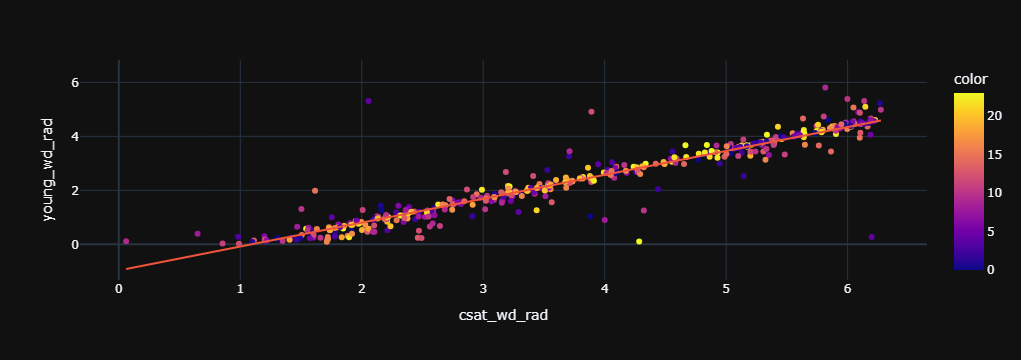

In [138]:
df_wd.loc[(df_wd['young_wd_rad']>3.2) & (df_wd['csat_wd_rad']<2),'csat_wd_rad'] = df_wd.loc[(df_wd['young_wd_rad']<3.2) & (df_wd['csat_wd_rad']>2),'csat_wd_rad'] + 6.25

fig = px.scatter(df_wd, x='csat_wd_rad', y='young_wd_rad', trendline="ols",color=df_wd.index.hour)
fig.show()

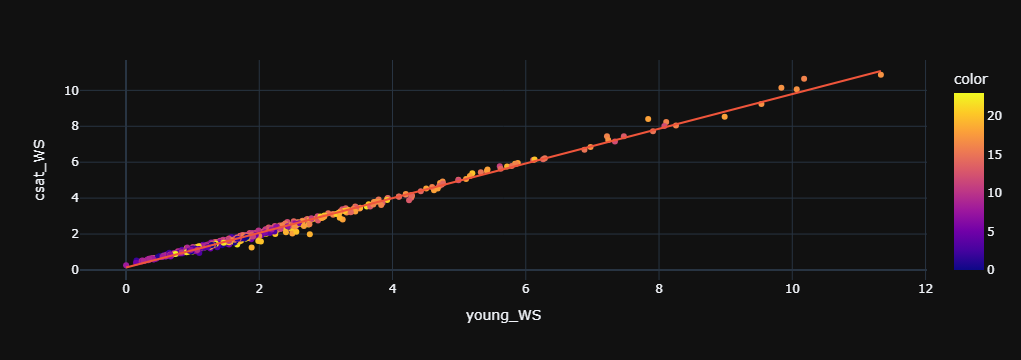

In [113]:

#fig = px.line(df_wd, y=["young_WS","csat_WS"],
#              title='custom tick labels')
fig = px.scatter(df_wd, x='young_WS', y='csat_WS', trendline="ols",color=df_wd.index.hour)
fig.show()

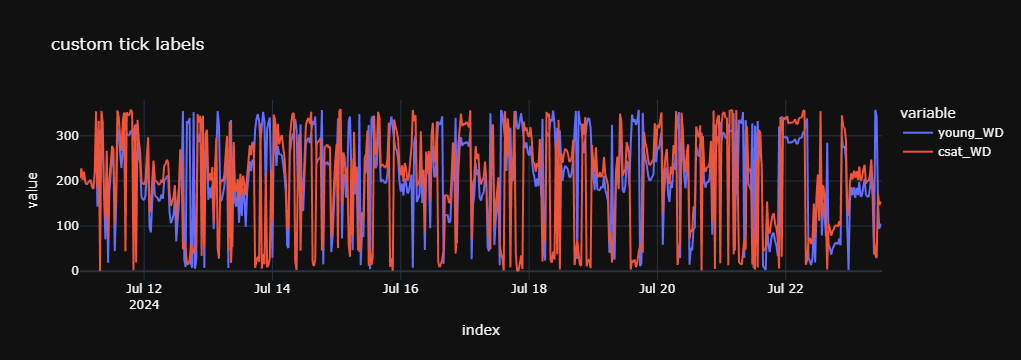

In [107]:


fig = px.line(df_wd, y=["young_WD","csat_WD"],
              title='custom tick labels')

fig.show()

const        38.679838
LW_OUT_AP     0.923404
dtype: float64


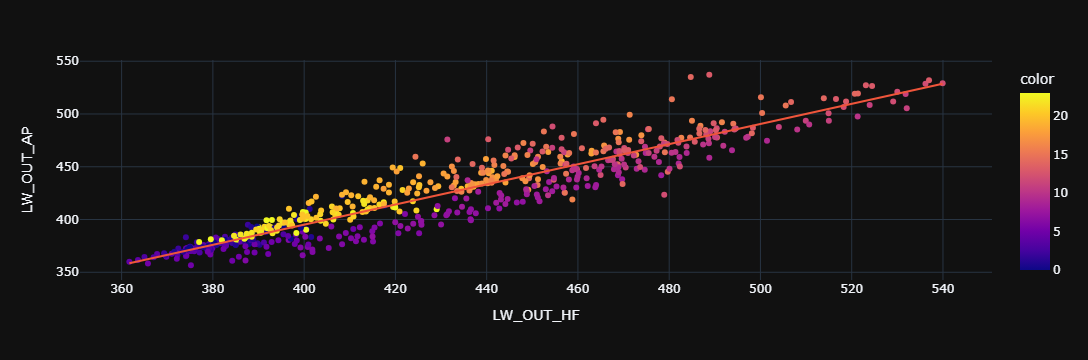

                            OLS Regression Results                            
Dep. Variable:              LW_OUT_HF   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     4376.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):          9.85e-274
Time:                        15:56:59   Log-Likelihood:                -2378.9
No. Observations:                 587   AIC:                             4762.
Df Residuals:                     585   BIC:                             4771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.6798      5.937      6.515      0.0

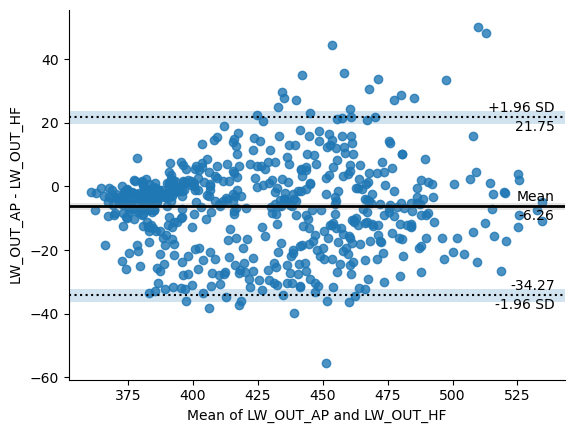

In [109]:
#raw_met_data['SW_IN'].plot()

comp_col = 'LW_OUT'

sql = "SELECT * FROM groundwater.amfluxeddy WHERE (groundwater.amfluxeddy.stationid = 'US-UTW') AND (groundwater.amfluxeddy.timestamp_start >= 202407110000)"
data = pd.read_sql(sql, con=engine)
data = data.replace(-9999, np.nan)
data.set_index('datetime_start', inplace=True)
for col in data.columns:
    data.rename(columns={col:col.upper()}, inplace=True)
#data['SW_IN'].plot()

df = pd.concat([data.rename(columns={f'{comp_col}':f'{comp_col}_HF'})[f'{comp_col}_HF'].shift(-1),
                raw_met_data.rename(columns={f'{comp_col}':f'{comp_col}_AP'})[f'{comp_col}_AP']],axis=1).dropna()


y = df[f'{comp_col}_HF']
x = df[f'{comp_col}_AP']
X = sm.add_constant(x)
model = sm.OLS(y,X)
results = model.fit()
print(results.params)



fig = px.scatter(df, x=f'{comp_col}_HF', y=f'{comp_col}_AP', trendline="ols",color=df.index.hour)

ax = pg.plot_blandaltman(x, y)

fig.show()
print(results.summary())

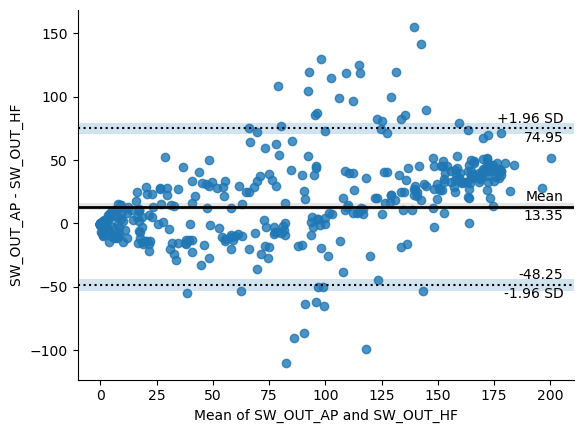

In [67]:
d = pg.plot_blandaltman(x, y)

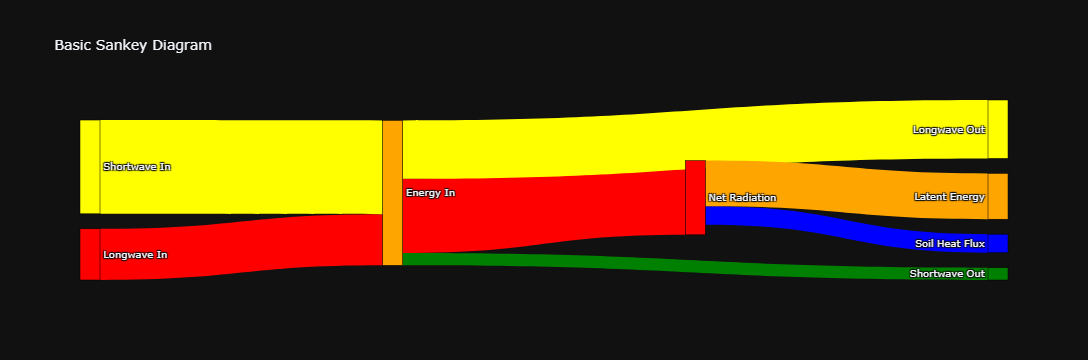

In [161]:
import plotly.graph_objects as go

dt_tm = pd.to_datetime('2024-07-15 11:00')
lwin  = data.loc[dt_tm,'LW_IN']
lwout = data.loc[dt_tm,'LW_OUT']
swin = data.loc[dt_tm,'SW_IN']
swout = data.loc[dt_tm,'SW_OUT']
shf = data.loc[dt_tm,'G']
le = data.loc[dt_tm,'LE']
h = data.loc[dt_tm,'H']
netrad = data.loc[dt_tm,'NETRAD']


import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = ["Longwave In", "Shortwave In","Energy In", "Net Radiation","Longwave Out", "Shortwave Out","Soil Heat Flux","Latent Energy","Sensible Heat"],
        color = ['red','yellow','orange','red','yellow','green','blue','orange']
    ),
    link = dict(
        source = [0,1,2,2,2,3,3,3,], # indices correspond to labels, eg A1, A2, A1, B1, ...
        target = [2,2,3,4,5,6,7,8,],
        value = [lwin,swin,netrad,lwout,swout,shf,le,h],
        color = ['red','yellow','red','yellow','green','blue','orange']
    ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [150]:
data.loc[dt_tm,'ALB']

12.07613

In [62]:
print(df.ptests(paired=True, stars=False))

          SW_OUT_HF SW_OUT_AP
SW_OUT_HF         -     0.000
SW_OUT_AP    -9.833         -


C:\Users\paulinkenbrandt\Anaconda3\envs\pygis311v4\Lib\site-packages\pingouin\pairwise.py:763: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [23]:
sql = "SELECT * FROM groundwater.amfluxeddy WHERE groundwater.amfluxeddy.stationid = 'US-UTW'"
data = pd.read_sql(sql, con=engine, )

data

,stationid,datetime_start,RECORD,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,...,RH_1_2_1,T_DP_1_2_1,TA_1_3_1,RH_1_3_1,T_DP_1_3_1,TA_1_4_1,PBLH_F,TS_2_1_1,SWC_2_1_1,T_CANOPY
0,US-UTW,2021-05-20 08:30:00,3050,202105200830,202105200900,407.2644,5.005207,7.278824,1.165805,-21.22704,...,30.644530,-0.491092,16.76229,33.57438,0.610996,-9999.00000,2056.1460,13.80275,26.85778,None
1,US-UTW,2021-05-20 09:00:00,3051,202105200900,202105200930,407.7179,5.687793,6.741088,1.327115,-19.22281,...,25.603640,-1.606802,18.31725,28.80552,-0.181496,-9999.00000,1627.3620,14.42237,26.86310,None
2,US-UTW,2021-05-20 09:30:00,3052,202105200930,202105201000,406.3490,4.168286,6.139927,1.284270,-22.90472,...,20.779270,-2.921037,20.16849,24.21374,-0.998767,-9999.00000,1125.0460,15.11649,26.91096,None
3,US-UTW,2021-05-20 10:00:00,3053,202105201000,202105201030,406.7009,3.976950,5.667840,1.149024,-26.63531,...,18.309870,-3.968961,20.94458,21.54570,-1.909985,-9999.00000,1380.7430,15.70732,26.96453,None
4,US-UTW,2021-05-20 10:30:00,3054,202105201030,202105201100,406.4454,3.858029,5.672696,1.118326,-32.14391,...,17.935150,-3.953480,21.33583,21.08741,-1.873573,-9999.00000,1287.0830,16.31986,26.98232,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55682,US-UTW,2024-07-23 09:30:00,-9999,202407230930,202407231000,368.6032,10.575600,6.478619,2.332695,-24.38892,...,15.563250,-2.410295,-9999.00000,98.95328,58.845180,27.89410,2023.6170,19.60121,34.10001,None
55683,US-UTW,2024-07-23 10:00:00,-9999,202407231000,202407231030,361.4945,13.314320,7.708470,3.197085,-39.83874,...,17.161540,-0.370931,-9999.00000,98.95437,58.846450,29.03444,1630.6980,20.13686,34.21332,None
55684,US-UTW,2024-07-23 10:30:00,-9999,202407231030,202407231100,368.6760,11.926480,5.242767,2.674489,-26.70993,...,11.141980,-6.023516,-9999.00000,98.95482,58.846960,29.72257,1000.0000,20.75039,34.32639,None
55685,US-UTW,2024-07-23 11:00:00,-9999,202407231100,202407231130,366.6481,13.571160,5.333927,2.753507,-20.14796,...,11.519130,-5.848532,-9999.00000,98.95490,58.847080,28.92892,145.6467,21.26992,34.42508,None


In [ ]:
cdf = pd.read_parquet('station_config/station_data/all_data.parquet')
cdf.replace(-9999,np.nan,inplace=True)
cdf['le_pos'] = cdf['LE'].apply(lambda x: np.nan if x < 0 else x)
cdf['et_pos'] = cdf['ET'].apply(lambda x: np.nan if x < 0 else x)

utw= cdf.loc['US-UTW']#.loc[pd.to_datetime('2021-01-15'):pd.to_datetime('2022-07-14')].copy(deep=True)

utw = utw.dropna(axis=1, how='all')
#for col in utd.columns:
#    if "SSITC" in col:
#        utd.drop([col],axis=1,inplace=True)
#td.drop(['station','TIMESTAMP_END','TIMESTAMP_START'],axis=1,inplace=True)

In [ ]:
cdf

In [ ]:
import plotly.express as px
import pandas as pd


fig = px.line(utw, x=utw.index, y=['SWC_1_1_1','SWC_2_1_1'], title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

cdf = pd.read_parquet('station_config/station_data/all_data.parquet')
cdf.replace(-9999,np.nan,inplace=True)
cdf['le_pos'] = cdf['LE'].apply(lambda x: np.nan if x < 0 else x)
cdf['et_pos'] = cdf['ET'].apply(lambda x: np.nan if x < 0 else x)

utw= cdf.loc['US-UTW']#.loc[pd.to_datetime('2021-01-15'):pd.to_datetime('2022-07-14')].copy(deep=True)

utw = utw.dropna(axis=1, how='all')



def find_irr_dates(df, swc_col='SWC_1_1_1', do_plot=False, dist=20, height=35, prom=0.5):
    """
    Finds irrigation dates within a DataFrame.

    :param df: A pandas DataFrame containing the data.
    :param swc_col: String. The column name in 'df' containing the soil water content data. Should be in units of percent and not a decimal; Default is 'SWC_1_1_1'.
    :param do_plot: Boolean. Whether to plot the irrigation dates on a graph. Default is False.
    :param dist: Integer. The minimum number of time steps between peaks in 'swc_col'. Default is 20.
    :param height: Integer. The minimum height (vertical distance) of the peaks in 'swc_col'. Default is 35(%).
    :param prom: Float. The minimum prominence of the peaks in 'swc_col'. Default is 0.5.

    :return: A tuple containing the irrigation dates and the corresponding soil water content values.
    """
    df_irr_season = df[df.index.month.isin([4,5,6,7,8,9,10])]
    peaks, _ = find_peaks(df_irr_season[swc_col], distance=dist, height=height,prominence=(prom,None))
    dates_of_irr = df_irr_season.iloc[peaks].index
    swc_during_irr = df_irr_season[swc_col].iloc[peaks]
    if do_plot:
        plt.plot(df.index,df[swc_col])
        plt.plot(dates_of_irr,swc_during_irr, "x")
        plt.show()
    return dates_of_irr, swc_during_irr

find_irr_dates(utw, 'SWC_1_1_1',do_plot=True)

In [ ]:
utw.iloc[peaks].index

In [ ]:
camp = pd.read_csv("C:/Users/paulinkenbrandt/Downloads/Wellington_Flux_CSFormat.dat",skiprows=[0,2,3],index_col='TIMESTAMP',
                   parse_dates=True)
camp = camp[camp.index < pd.to_datetime('2025-01-01')]
fig = px.line(camp, x=camp.index, y='TA_1_1_1', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

camp

In [ ]:
fig = px.line(utw, x=utw.index, y=['TA_1_1_1','TA_1_2_1','TA_1_3_1'], title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0, max_iter=30, missing_values=np.nan,
                            sample_posterior=True,n_nearest_features=100,)
imp_mean.fit(utd)
#X = [[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]]
new_utd = pd.DataFrame(imp_mean.transform(utd), columns=utd.columns)
utd['imp_LE'] = new_utd['LE']


In [ ]:
fig = px.line(utd, y=['LE'], title='Time Series with Range Slider and Selectors')


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [ ]:


new_utd.index = utd.index
new_utd['NETRAD'].resample('1D').sum().plot()
new_utd['LE'].resample('1D').sum().plot()
new_utd['G'].resample('1D').sum().plot()
new_utd['H'].resample('1D').sum().plot()


In [ ]:
import matplotlib
import matplotlib.pyplot as plt

dlybalance = new_utd[['LE','NETRAD','G','H']].resample('1D').sum()#.plot()
plt.scatter(dlybalance['LE']+dlybalance['H'],dlybalance['NETRAD']-dlybalance['G'])
plt.plot([1000,8000],[1000,8000])
plt.grid()

In [ ]:
pd.read_csv(r"C:\Users\paulinkenbrandt\Downloads\Dugout Ranch_Flux_AmeriFluxFormat.dat",skiprows=[0,2,3])

In [ ]:
sql = "SELECT * FROM groundwater.amfluxeddy"
df = pd.read_sql(sql, engine)
existing = df.station.unique()

site_folders = {'US-UTD':'Dugout_Ranch','US-UTB':'BSF','US-UTJ':'Bluff','US-UTW':'Wellington','US-UTE':'Escalante',
                'US-UTM':'Matheson','US-UTP':'Phrag','US-CdM':'Cedar_mesa','US-UTV':'Desert_View_Myton'}

for key, value in site_folders.items():
    if key in existing:
        pass
    else:
        print(key)
        raw_fold = pathlib.Path('H:/UGS_Flux/Data_Downloads/')
        raw_data = flux_network.raw_file_compile(raw_fold, value)
        if raw_data is not None:
            am_data = flux_network.Reformatter(raw_data)
    
            am_df = am_data.et_data
            am_df['station'] = key
            am_df = flux_network.remove_extra_soil_params(am_df)
    
            print(len(raw_data))
            print(len(am_df))
    
            am_df.to_sql(name = 'amfluxeddy',schema='groundwater', con=engine, if_exists='append', chunksize=2000)
            #am_df.to_csv(f'{key}_amfluxeddy.csv')

In [ ]:
sql = "SELECT * FROM groundwater.amfluxeddy"
df = pd.read_sql(sql, engine)
statdf = df.set_index(['station','datetime_start'])
for station in statdf.index.get_level_values(0).unique():
    statdf.loc[station,'ET'].plot()

In [ ]:
statdf.loc['US-UTD']